In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:
boston_data = boston.load_data()

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 558.0648 - mae: 22.2176 - val_loss: 1665.1899 - val_mae: 37.7163
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 550.1514 - mae: 22.1674 - val_loss: 898.9402 - val_mae: 28.5715
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 540.0493 - mae: 21.8053 - val_loss: 832.1445 - val_mae: 27.5369
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 531.0166 - mae: 21.7672 - val_loss: 918.2033 - val_mae: 29.2305
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 508.4818 - mae: 21.0083 - val_loss: 653.0042 - val_mae: 24.4027
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 405.3446 - mae: 18.8263 - val_loss: 538.3549 - val_mae: 22.3802
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 290.9495 - mae: 15.9769 - val_loss: 392.3156 - val_mae: 18.8841
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 203.0615 - mae: 12.9566 - val_loss: 452.0800 - val_mae: 20.4780
Epoch 9/20
13/13 ━━━━━

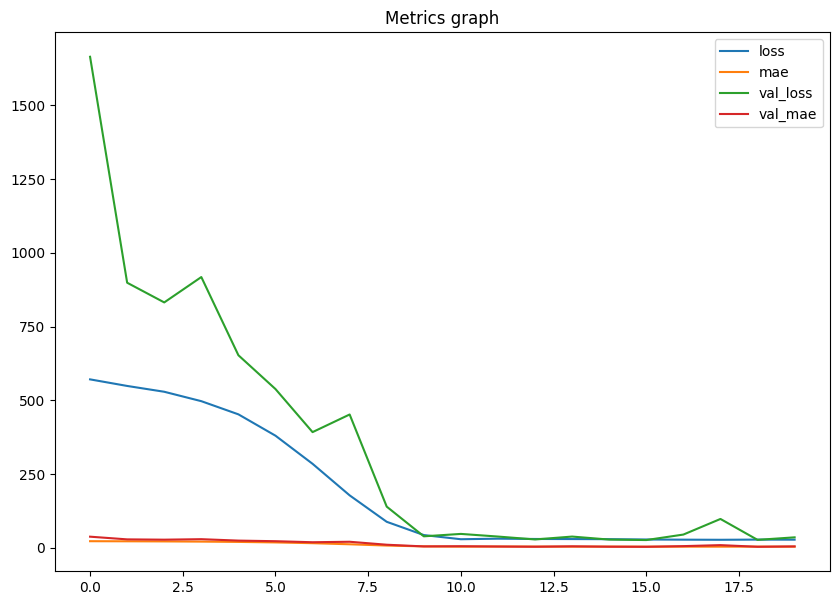

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [15]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


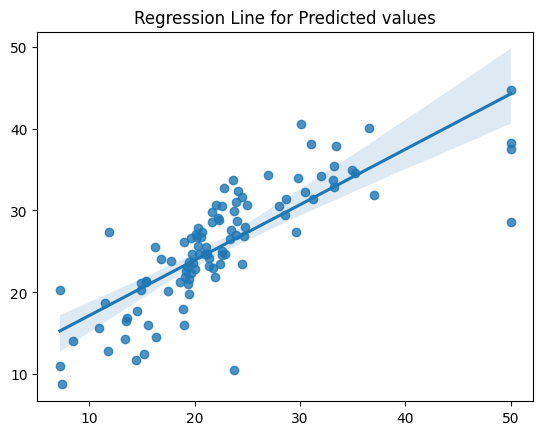

In [16]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [17]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [18]:
regression_metrics_display(y_test, y_pred)

NameError: name 'metrics' is not defined